In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from utils import SinusoidalConcatenation

In [1]:
gen = SinusoidalConcatenation(sample_rate=20)
frequencies = [1, 2, 10]  # frequencies in Hz
start_periods = [0, 0.5, 0.5]  # starting periods in radians (between 0 & 1)
durations = [3,3,1]  # total duration in seconds
total_duration = sum(durations)
signal = gen.generate_signal(frequencies, start_periods, durations)

# Plotting the generated signal
plt.figure()
plt.title("Concatenated Sinusoidal Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.plot(np.linspace(0, total_duration, int(gen.sample_rate * total_duration), endpoint=False), signal)
plt.show()

NameError: name 'SinusoidalConcatenation' is not defined

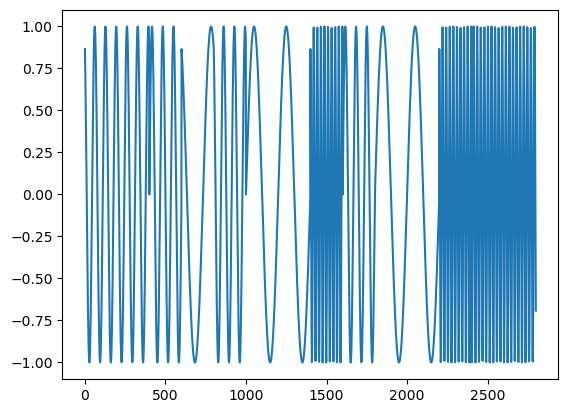

In [54]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

nb_segments = 10
gen = SinusoidalConcatenation(sample_rate=200)
frequencies = np.random.choice([1, 3, 9],size=nb_segments)
start_periods = np.random.choice([0, 1/3, 2/3],size=nb_segments)
segment_durations = np.random.randint(1,3,size=nb_segments)
signal = gen.generate_signal(frequencies, start_periods, segment_durations)
signal = torch.FloatTensor(signal).view(-1, 1)
signal = signal # + torch.randn_like(signal) * 0.1
plt.plot(signal)

In [55]:
# Hyperparameters
input_size = 1
hidden_size = 50
output_size = 1
seq_len = 200
num_layers = 1
learning_rate = 0.01
num_epochs = 200

In [56]:
# Prepare data for training
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq, train_label))
    return inout_seq

train_data = create_inout_sequences(signal, seq_len)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
len(train_data)

2600

In [76]:

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

model = RNN(input_size, hidden_size, num_layers, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for i in range(signal.shape[0]//seq_len):
        random_index = np.random.randint(0, (signal.shape[0]-seq_len))
        seq = signal[random_index:random_index+seq_len].view(-1, 1)
        labels = signal[random_index+1:random_index+seq_len+1].view(-1, 1)
        
        for x in seq:
            x_next = model(x)
        print(seq.shape)
        print(labels.shape)
        y_pred = model(seq)
        print(y_pred.shape,labels.shape)
        
        optimizer.zero_grad()
        loss = criterion(y_pred, labels)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    test_seq = signal[:seq_len].view(1, -1, 1)
    predicted = []
    for i in range(len(signal) - seq_len):
        new_output = model(test_seq)
        predicted.append(new_output)
        test_seq = torch.cat((test_seq[:, 1:, :], new_output.view(1, 1, 1)), dim=1)

# Plot the original and predicted signals
predicted_signal = torch.stack(predicted).view(-1, 1).numpy()
plt.figure(figsize=(15, 5))
plt.plot(signal.numpy(), label='Original Signal')
plt.plot(np.arange(seq_len, seq_len + len(predicted_signal)), predicted_signal, label='Predicted Signal')
plt.legend()
plt.show()

torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])


c:\Users\fphub\mambaforge\envs\deep_env\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1, 200, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size([1, 1]) torch.Size([1, 200, 1])
torch.Size(

KeyboardInterrupt: 